In [1]:
# weather 분포 불러오기

import pandas as pd

obj = 'weather'
dataset_name = f'./dataset/{obj}/{obj}.csv'

df_base = pd.read_csv(dataset_name, encoding='utf8')

In [2]:
df_base

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,433.0
52692,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,439.6
52693,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,435.2
52694,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47,433.9


In [3]:
import matplotlib
import matplotlib.pyplot as plt

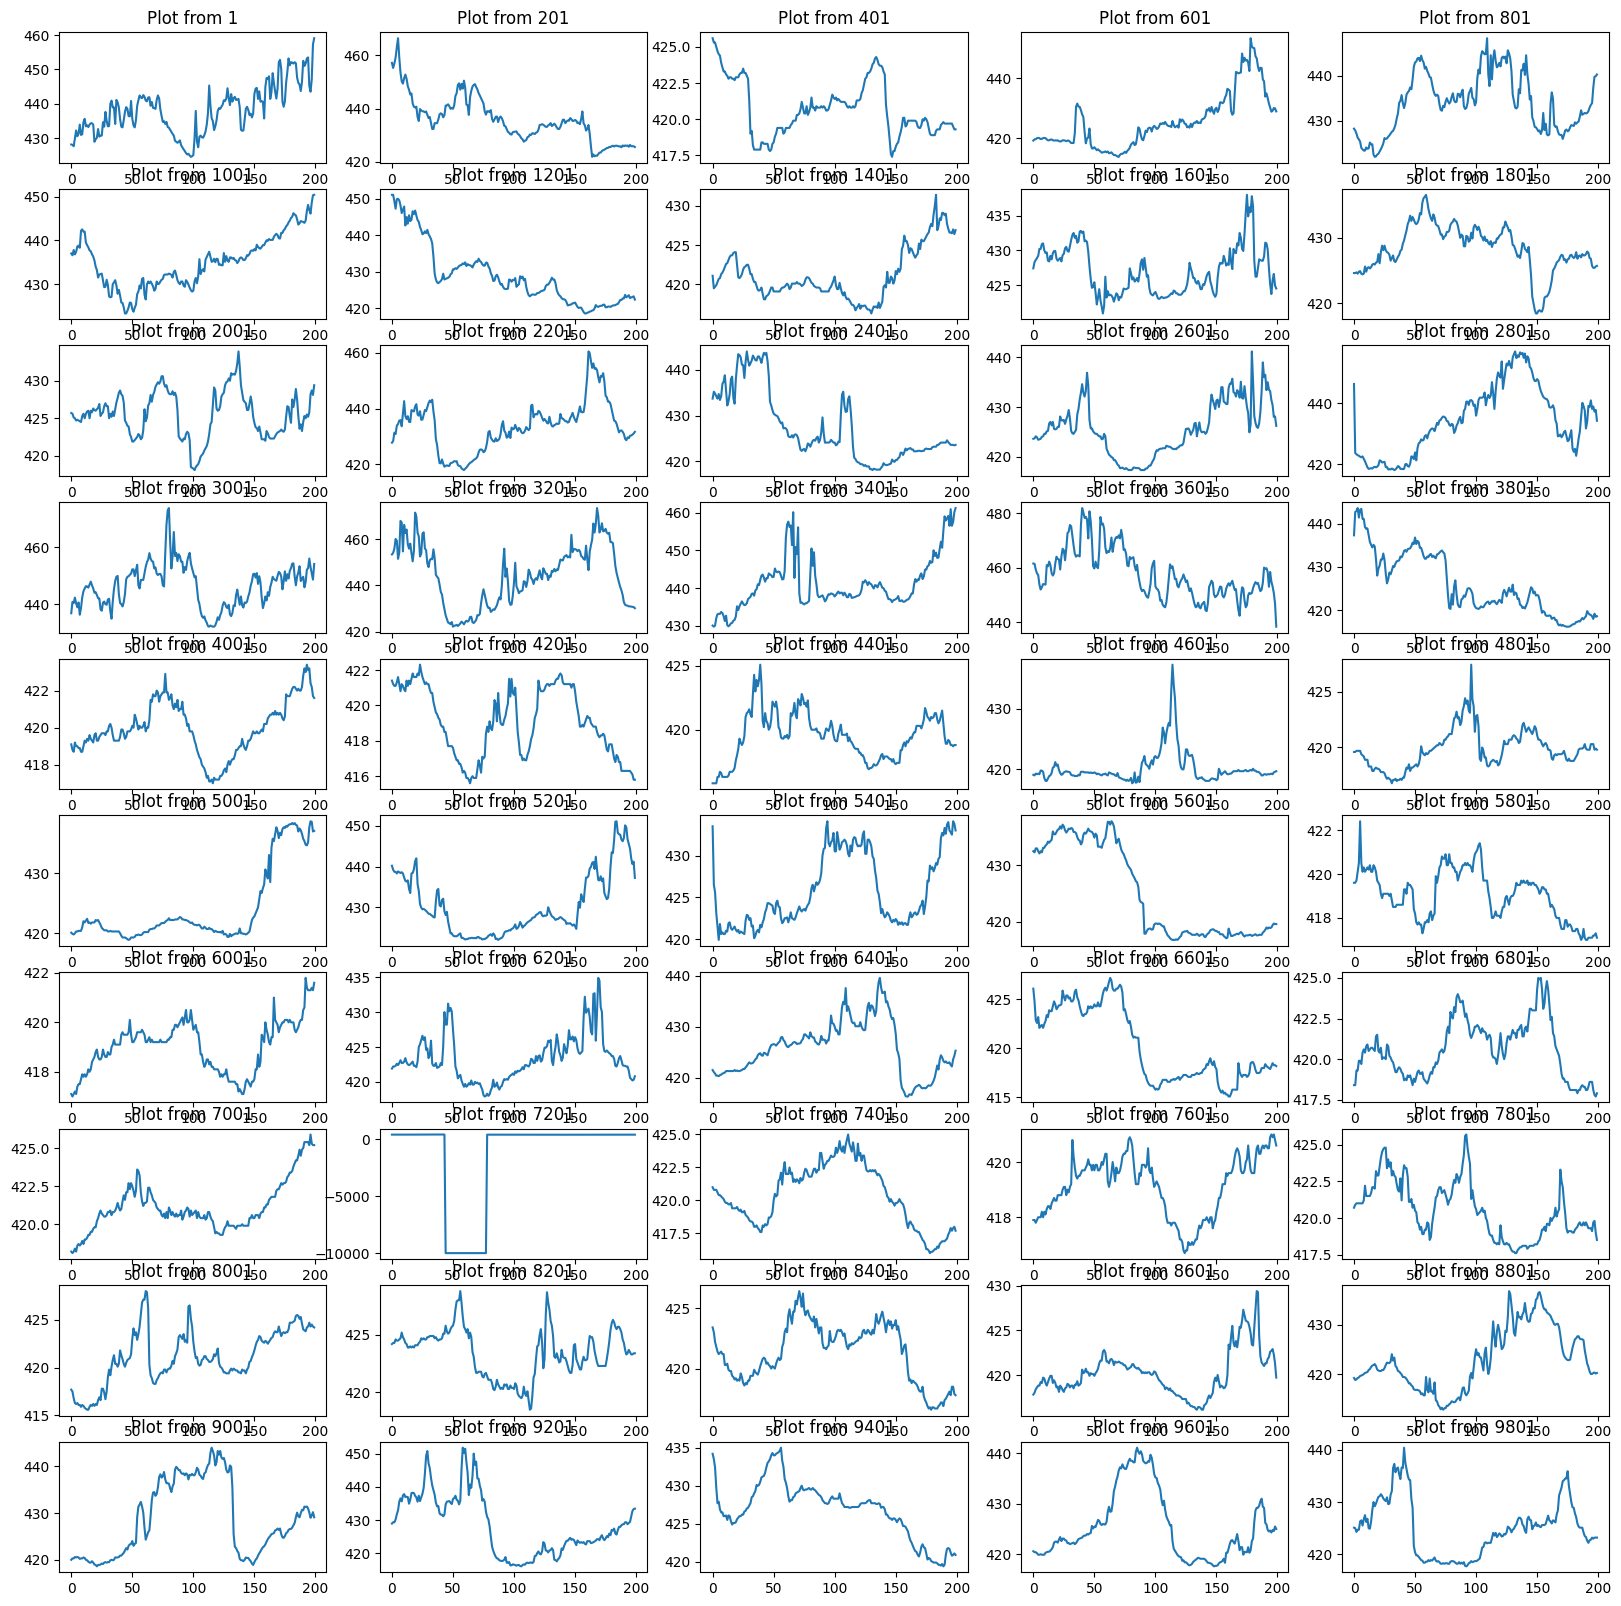

In [12]:
unit_len = 200

fig, axs = plt.subplots(10, 5, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정

for i in range(10):
    for j in range(5):
        x = range(unit_len)
        y = df_base['OT'][unit_len*(5*i+j): unit_len*(5*i+j+1)]
        ax = axs[i, j]
        ax.plot(x, y)  # 예제: 서로 다른 사인 곡선 플롯
        ax.set_title(f'Plot from {(i*5 + j)*unit_len + 1}')
        # ax.axis('off')  # 축을 끄고 싶다면 사용

plt.show()

In [10]:
y

9800    425.1
9801    425.0
9802    424.3
9803    424.7
9804    424.7
        ...  
9995    423.2
9996    423.0
9997    423.2
9998    423.2
9999    423.2
Name: OT, Length: 200, dtype: float64

In [14]:
# -9999 값을 찾아서 보정후 weather_re.csv로 저장

import pandas as pd
import numpy as np

# -9999.0 값을 NaN으로 대체
df_base.replace(-9999.0, np.nan, inplace=True)

# 각 열의 평균 값으로 NaN 대체
df_base.fillna(df_base.mean(), inplace=True)

# 보정된 데이터 확인
df_base.describe()

C:\Users\Yohan\AppData\Local\Temp\ipykernel_32276\2294197232.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_base.fillna(df_base.mean(), inplace=True)


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,...,2.185725,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,314.473432,21.515206,427.691863
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,...,1.601595,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,514.128921,7.790620,18.690840
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,...,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.900000,305.500000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,...,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,415.600000
50%,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,...,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.320000,20.440000,423.200000
75%,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,...,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,437.100000
max,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,...,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,524.200000


In [15]:
# weather_re.csv 파일로 저장
df_base.to_csv('./dataset/weather/weather_re.csv')